# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

from keras.utils import np_utils
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from keras.datasets import cifar10
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
from tensorflow.keras import optimizers

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
OPTIMIZER = [optimizers.SGD, optimizers.RMSprop, optimizers.Adagrad, optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
import itertools
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {lr}, OPTIMIZER: {opti}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.1, OPTIMIZER: <class 'keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 3s 16ms/step - loss: 2.0395 - accuracy: 0.2571 - val_loss: 1.8554 - val_accuracy: 0.3190
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 1.8230 - accuracy: 0.3476 - val_loss: 1.9545 - val_accuracy: 0.3120
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 1.7413 - accuracy: 0.3775 - val_loss: 1.6750 - val_accuracy: 0.4011
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 1.6771 - accuracy: 0.4019 - val_loss: 1.7887 - val_accuracy: 0.3497
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 1.6297 - accuracy: 0.4206 - val_loss: 1.6709 - val_accuracy: 0.4024
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 1.5771 - accuracy: 0.4359 - val_loss: 1.7287 - val_accuracy: 0.3659
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 1.5525 - accuracy: 0.4458 - val_loss: 1.5482 - val_accuracy: 0.4457

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 5s 25ms/step - loss: 18003.4609 - accuracy: 0.0998 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 5s 23ms/step - loss: 15.0436 - accuracy: 0.0983 - val_loss: 2.3170 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 5s 23ms/step - loss: 2.3078 - accuracy: 0.0992 - val_loss: 2.3205 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 5s 23ms/step - loss: 2.3080 - accuracy: 0.1000 - val_loss: 2.3149 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 5s 25ms/step - loss: 2.3080 - accuracy: 0.0992 - val_loss: 2.3163 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 2.3081 - accuracy: 0.0990 - val_loss: 2.3142 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 5s 25ms/step - loss: 2.3081 - accuracy: 0.0971 - val_loss: 2.3077 - val_accuracy: 0

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 4s 17ms/step - loss: 2.2537 - accuracy: 0.1676 - val_loss: 2.1745 - val_accuracy: 0.1870
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 2.0451 - accuracy: 0.2482 - val_loss: 2.0723 - val_accuracy: 0.2253
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 1.8845 - accuracy: 0.3205 - val_loss: 1.8096 - val_accuracy: 0.3263
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 1.8088 - accuracy: 0.3453 - val_loss: 1.7433 - val_accuracy: 0.3688
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 1.7492 - accuracy: 0.3675 - val_loss: 1.8484 - val_accuracy: 0.3280
Epoch 6/10
196/196 [==============================] - 3s 17ms/step - loss: 1.7043 - accuracy: 0.3891 - val_loss: 1.7156 - val_accuracy: 0.3847
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 1.6576 - accuracy: 0.4067 - val_loss: 1.6808 - val_accuracy: 0.3851

C:\Users\jmk80\anaconda3\envs\chatbot-web\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
196/196 [==============================] - 16s 77ms/step - loss: 276.6486 - accuracy: 0.0992 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 14s 73ms/step - loss: 2.4417 - accuracy: 0.1008 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 16s 79ms/step - loss: 2.3043 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 14s 72ms/step - loss: 2.3044 - accuracy: 0.1001 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 14s 74ms/step - loss: 2.3048 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 14s 74ms/step - loss: 2.3045 - accuracy: 0.1010 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 15s 77ms/step - loss: 2.3053 - accuracy: 0.0990 - val_loss: 2.3047 - val_accurac

Epoch 4/10
196/196 [==============================] - 4s 19ms/step - loss: 1.6839 - accuracy: 0.4024 - val_loss: 1.7893 - val_accuracy: 0.3734
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 1.6397 - accuracy: 0.4204 - val_loss: 1.7695 - val_accuracy: 0.3446
Epoch 6/10
196/196 [==============================] - 4s 19ms/step - loss: 1.6061 - accuracy: 0.4334 - val_loss: 1.7361 - val_accuracy: 0.3808
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 1.5827 - accuracy: 0.4417 - val_loss: 1.7327 - val_accuracy: 0.3823
Epoch 8/10
196/196 [==============================] - 4s 19ms/step - loss: 1.5502 - accuracy: 0.4534 - val_loss: 1.6470 - val_accuracy: 0.4228
Epoch 9/10
196/196 [==============================] - 4s 19ms/step - loss: 1.5215 - accuracy: 0.4641 - val_loss: 1.6897 - val_accuracy: 0.4172
Epoch 10/10
196/196 [==============================] - 4s 20ms/step - loss: 1.5007 - accuracy: 0.4706 - val_loss: 1.7870 - val_accuracy: 0.381

Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 1.5744 - accuracy: 0.4402 - val_loss: 1.7696 - val_accuracy: 0.3651
Epoch 8/10
196/196 [==============================] - 5s 27ms/step - loss: 1.5366 - accuracy: 0.4523 - val_loss: 1.6562 - val_accuracy: 0.4110
Epoch 9/10
196/196 [==============================] - 6s 31ms/step - loss: 1.4985 - accuracy: 0.4667 - val_loss: 1.6256 - val_accuracy: 0.4170
Epoch 10/10
196/196 [==============================] - 5s 25ms/step - loss: 1.4709 - accuracy: 0.4757 - val_loss: 1.5436 - val_accuracy: 0.4367
Experiment with LR = 0.001, OPTIMIZER: <class 'keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376  

Epoch 10/10
196/196 [==============================] - 3s 17ms/step - loss: 2.2612 - accuracy: 0.1632 - val_loss: 2.2556 - val_accuracy: 0.1720
Experiment with LR = 0.0001, OPTIMIZER: <class 'keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                              

 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 5s 21ms/step - loss: 2.3609 - accuracy: 0.1091 - val_loss: 2.3548 - val_accuracy: 0.1107
Epoch 2/10
196/196 [==============================] - 4

                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 4s 20ms/step - loss: 2.1433 - accuracy: 0.2404 - val_loss: 2.0136 - val_accuracy: 0.2974
Epoch 2/10
196/196 [==============================] - 4s 19ms/step - loss: 1.9483 - accuracy: 0.3237 - val_loss: 1.8968 - val_accuracy: 0.3405
Epoch 3/10
196/196 [==============================] - 4s 20ms/step - loss: 1.8637 - accuracy: 0.3549 - val_loss: 1.8351 - val_accuracy: 0.3621
Epoch 4/10
196/196 [==============================] - 4s 20ms/step - loss: 1.8139 - accuracy: 0.3710 - val_loss: 1.7982 - val_accuracy: 0.3728
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 1.7789 - accu

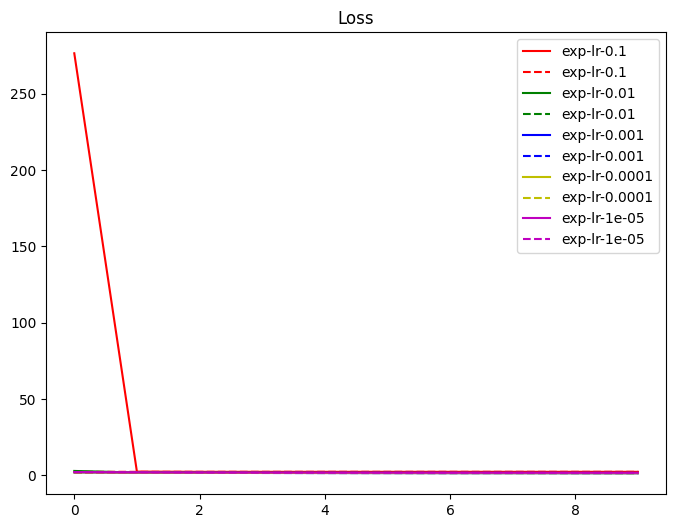

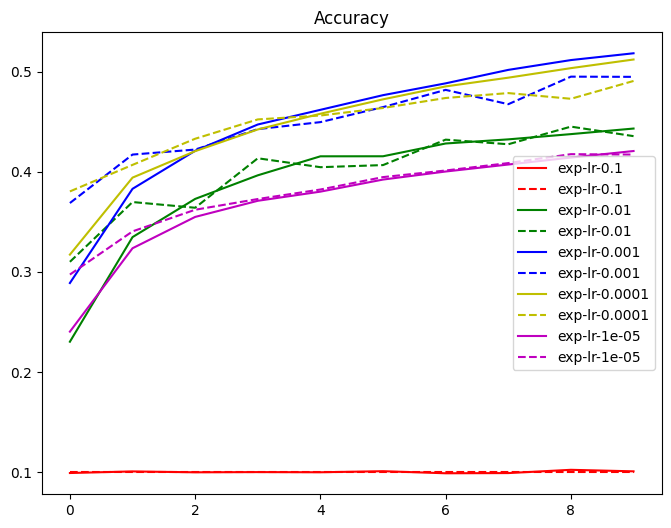

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()